In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('historical_data.csv')

In [3]:
df2=pd.read_csv('fear_greed_index.csv')

In [4]:
df2.shape

(2644, 4)

In [ ]:
t=pd.to_datetime(df2['timestamp'],unit="s").dt.time
t.items # All time are same 

<bound method IndexOpsMixin.item of 0       05:30:00
1       05:30:00
2       05:30:00
3       05:30:00
4       05:30:00
          ...   
2639    05:30:00
2640    05:30:00
2641    05:30:00
2642    05:30:00
2643    05:30:00
Name: timestamp, Length: 2644, dtype: object>

In [4]:
df2=df2.drop(columns='timestamp')
df2['date']=pd.to_datetime(df2['date'],format='%Y-%m-%d')
df4=df2.copy()

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   value           2644 non-null   int64         
 1   classification  2644 non-null   object        
 2   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 62.1+ KB


In [31]:
df['Timestamp IST'].head()

0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
Name: Timestamp IST, dtype: object

In [5]:
df['Date_of_trading']=df['Timestamp IST'].str.split(' ').str[0]
df['Time_of_trading']=df['Timestamp IST'].str.split(' ').str[1]
df['Date_of_trading']=pd.to_datetime(df['Date_of_trading'], format="%d-%m-%Y")
df['Trading_hour']=pd.to_datetime(df['Time_of_trading']).dt.hour
df['Trading_minute']=pd.to_datetime(df['Time_of_trading']).dt.minute
df3=df.copy()

C:\Users\Abhi9\AppData\Local\Temp\ipykernel_12784\3472555227.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trading_hour']=pd.to_datetime(df['Time_of_trading']).dt.hour
C:\Users\Abhi9\AppData\Local\Temp\ipykernel_12784\3472555227.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trading_minute']=pd.to_datetime(df['Time_of_trading']).dt.minute


In [6]:
df=df.drop(columns=['Time_of_trading','Timestamp'],axis=1)

In [9]:
df.shape # massive dataset

(211224, 18)

In [7]:
df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Date_of_trading     0
Trading_hour        0
Trading_minute      0
dtype: int64

In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [83]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Trading_hour', 'Trading_minute', 'Trading_year', 'Trading_month',
       'Trading_day'],
      dtype='object')

In [8]:
df['Trading_year']=df['Date_of_trading'].dt.year
df['Trading_month']=df['Date_of_trading'].dt.month
df['Trading_day']=df['Date_of_trading'].dt.day
df=df.drop(columns='Date_of_trading')

In [9]:
df['Side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [13]:
df['Direction'].unique()

array(['Buy', 'Sell', 'Open Long', 'Close Long', 'Spot Dust Conversion',
       'Open Short', 'Close Short', 'Long > Short', 'Short > Long',
       'Auto-Deleveraging', 'Liquidated Isolated Short', 'Settlement'],
      dtype=object)

In [ ]:
result={}
year=df.groupby('Trading_year')
for group,data in year:
    result[group]=data['Side'].value_counts(normalize=True)*100

In [9]:
year_wise_buy_or_sell=pd.DataFrame(result).T
year_wise_buy_or_sell

Side        BUY       SELL
2023  50.581395  49.418605
2024  44.351106  55.648894
2025  50.029991  49.970009

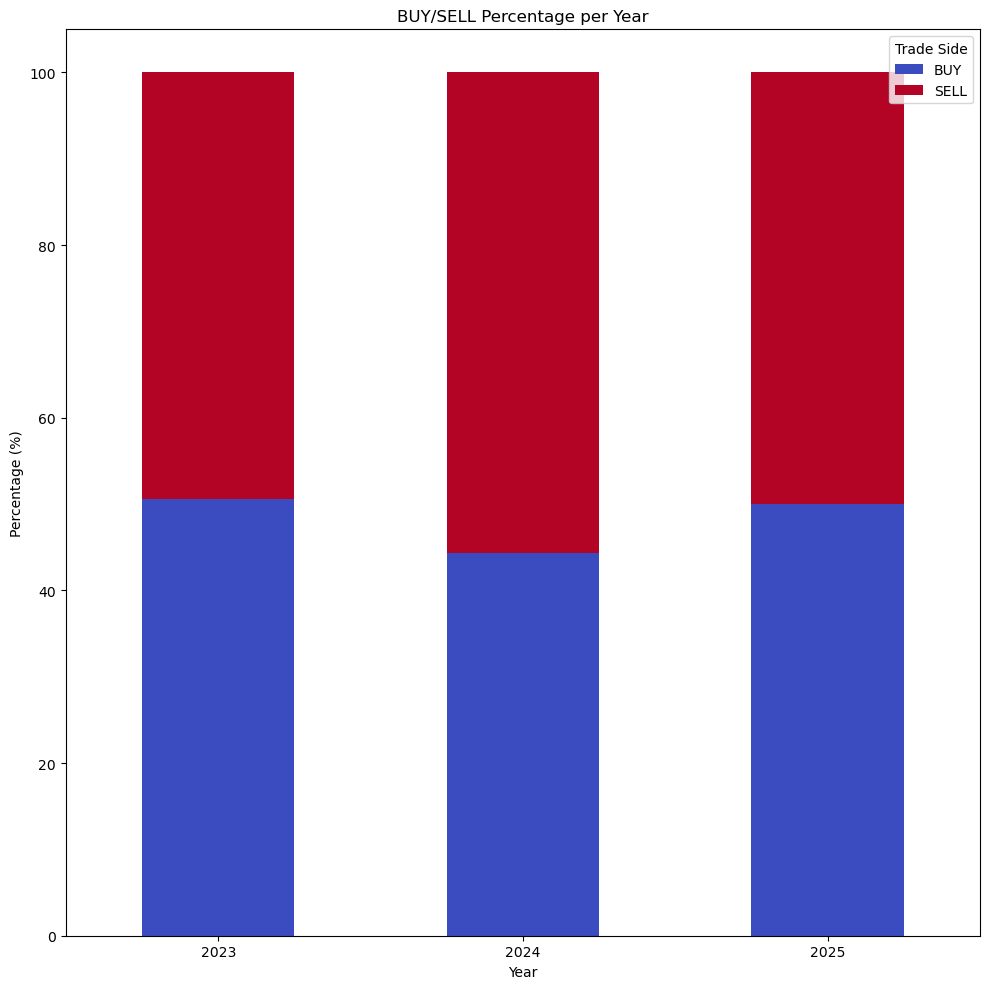

In [15]:
year_wise_buy_or_sell.plot(kind='bar',stacked=True,figsize=(10,10),colormap='coolwarm')
plt.title("BUY/SELL Percentage per Year")
plt.ylabel("Percentage (%)")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title='Trade Side')
plt.tight_layout()
plt.show()

In [ ]:
# From that graph 2024 may be a fluctuated year in terms of High price 
# they tend to sell more than buy

In [ ]:
result={}
year_month=df.groupby(['Trading_year','Trading_month'])
for group,data in year_month:
    result[group]=data['Side'].value_counts(normalize=True)*100 # Data of all the months of 2024 is present
pd.DataFrame(result).T # August and September is specatcular

Side            BUY       SELL
2023 5   100.000000        NaN
     12   50.146628  49.853372
2024 1    50.500000  49.500000
     2    51.040062  48.959938
     3    45.065177  54.934823
     4    42.833194  57.166806
     5    43.892829  56.107171
     6    49.108368  50.891632
     7    44.655582  55.344418
     8    61.648177  38.351823
     9    23.333333  76.666667
     10   42.579750  57.420250
     11   45.120832  54.879168
     12   42.487619  57.512381
2025 1    44.830196  55.169804
     2    53.942896  46.057104
     3    49.823737  50.176263
     4    48.726078  51.273922
     5    55.772358  44.227642

In [16]:
month_buy_sell=pd.DataFrame(df.groupby('Trading_month')['Side'].value_counts(normalize=True)*100).reset_index()

In [17]:
month_buy_sell.columns

Index(['Trading_month', 'Side', 'proportion'], dtype='object')

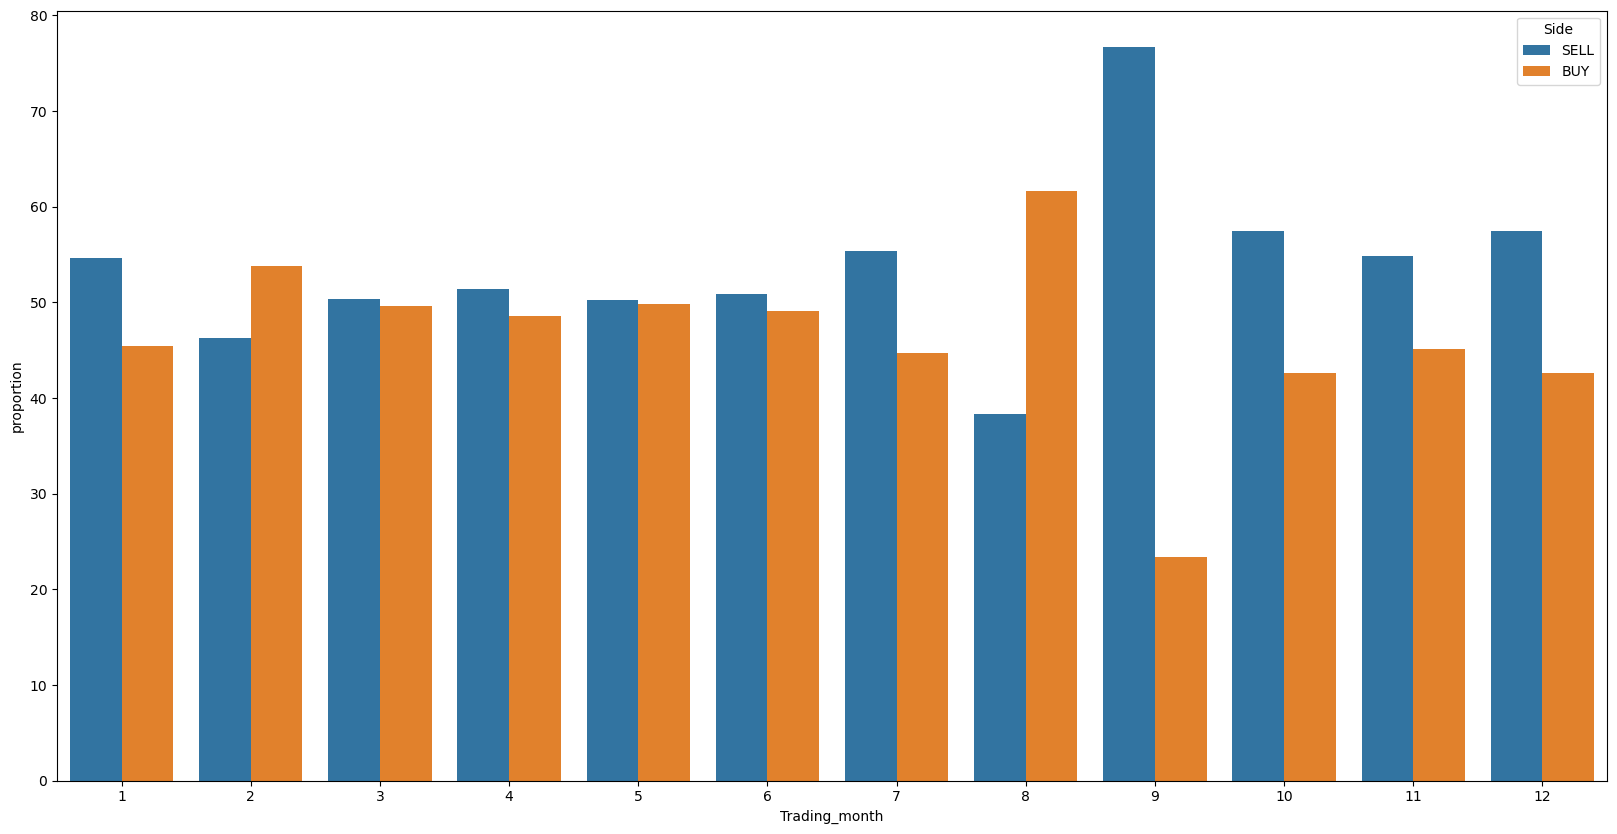

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(data=month_buy_sell,x='Trading_month',y='proportion',hue='Side')
plt.show()

In [10]:
df=df.drop(columns='Timestamp IST',axis=1)

In [11]:
df_2023=df[df['Trading_year']==2023]

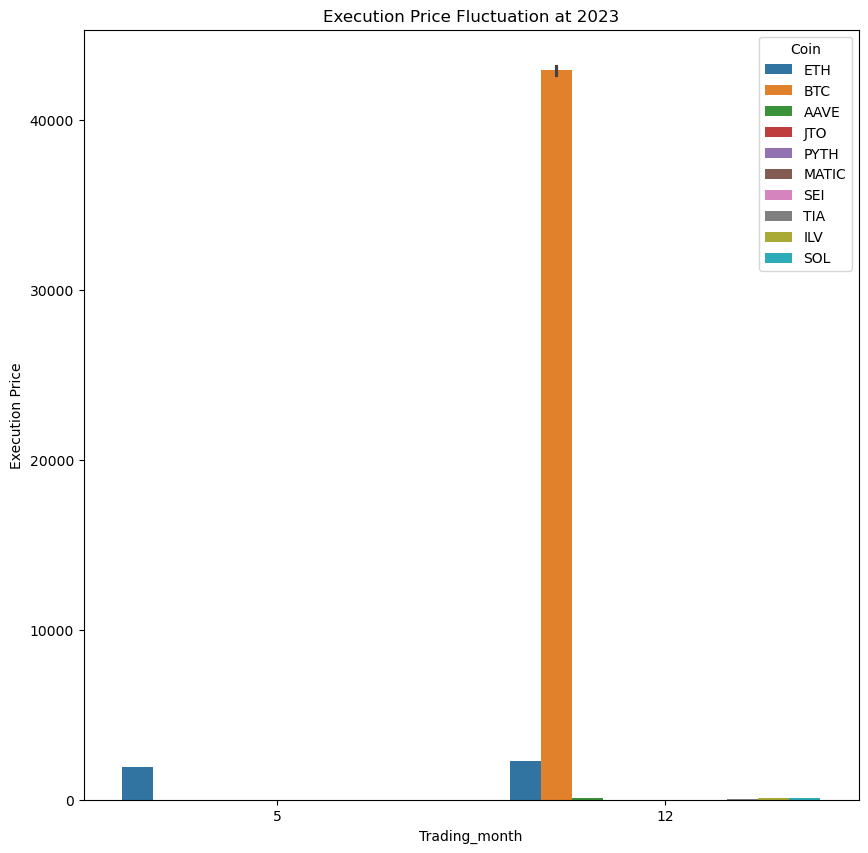

In [ ]:

plt.figure(figsize=(10,10))
plt.title('Execution Price Fluctuation at 2023')
sns.barplot(data=df_2023,x='Trading_month',y='Execution Price',hue='Coin')
plt.show()

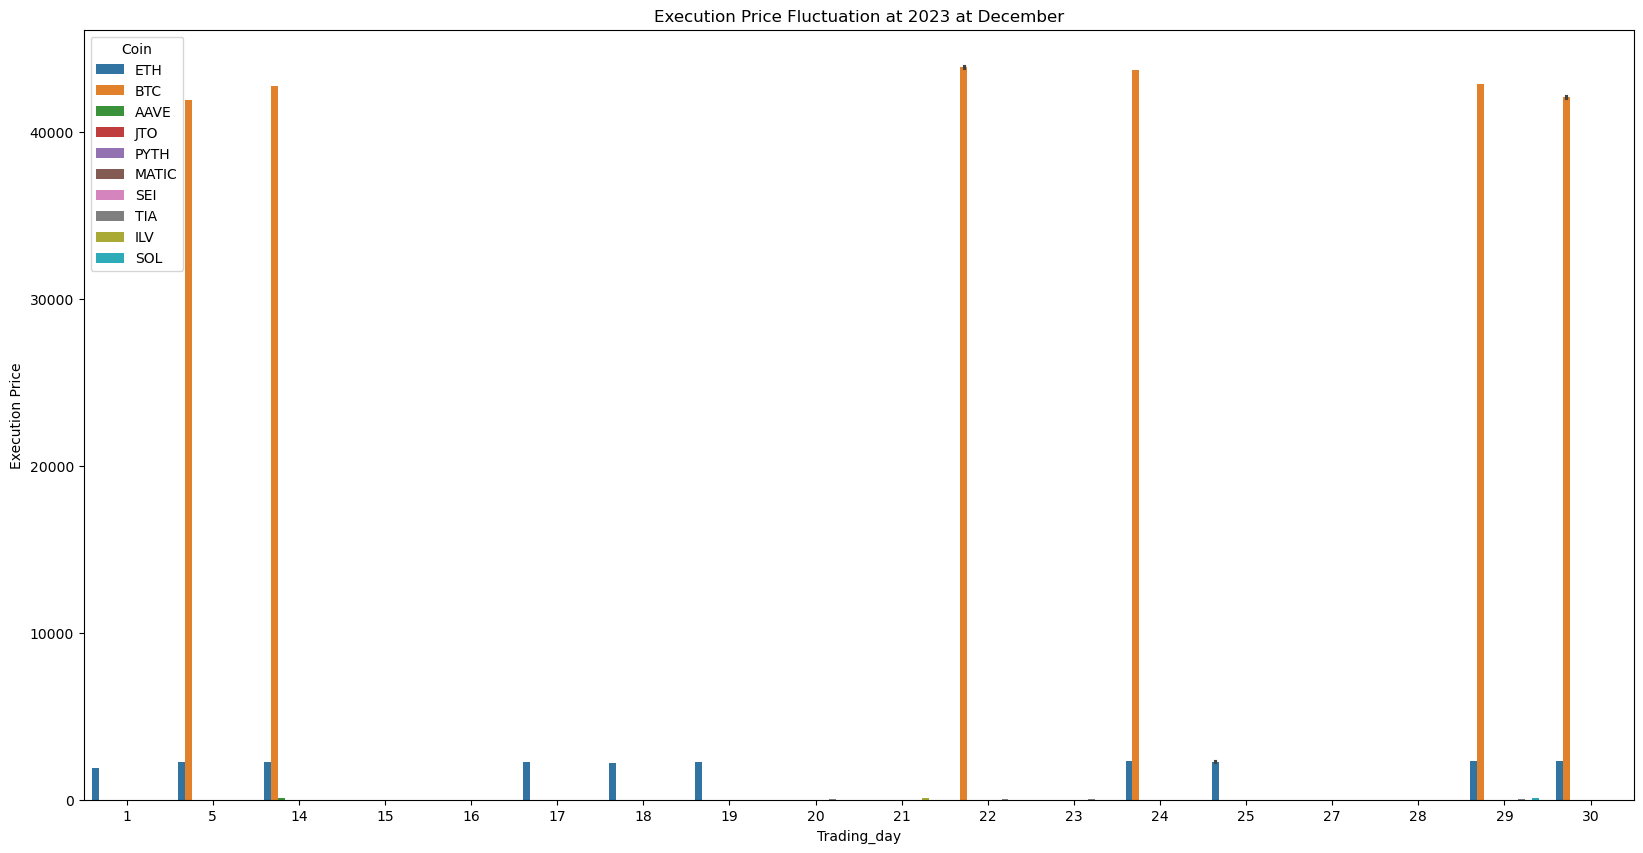

In [63]:
plt.figure(figsize=(20,10))
plt.title('Execution Price Fluctuation at 2023 at December')
sns.barplot(data=df_2023,x='Trading_day',y='Execution Price',hue='Coin')
plt.show()

In [ ]:
import plotly.express as px # interactable plot
coin_2023=df_2023['Coin'].astype(str)
plt.figure(figsize=(25,20))
px.scatter(x=df_2023['Start Position'],y=df_2023['Closed PnL'],color=coin_2023,color_discrete_sequence=px.colors.qualitative.G10).show()

<Figure size 2500x2000 with 0 Axes>

In [26]:
df.sample(5)

Account   Coin  Execution Price  \
34638   0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  AIXBT           0.2296   
122877  0x47add9a56df66b524d5e2c1993a43cde53b6ed85   @107          33.5000   
197687  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4   HYPE          14.1560   
67643   0xbaaaf6571ab7d571043ff1e313a9609a10637864   HYPE          20.0890   
24933   0x4f93fead39b70a1824f981a54d4e55b278e9f760    BTC       93505.0000   

        Size Tokens  Size USD  Side     Timestamp IST  Start Position  \
34638    4161.00000    955.37  SELL  03-02-2025 07:38   130743.000000   
122877     22.38000    749.73   BUY  21-12-2024 13:19     3364.128918   
197687      8.45000    119.62   BUY  10-03-2025 21:45    25836.870000   
67643     197.52000   3967.98   BUY  25-02-2025 05:23   179482.850000   
24933       0.04964   4641.59   BUY  23-12-2024 20:54        6.400190   

         Direction  Closed PnL  \
34638   Close Long    -19.1406   
122877         Buy      0.0000   
197687   Open Long      0.0000   
67643    Open Long      0.0000   
24933    Open Long      0.0000   

                                         Transaction Hash     Order ID  \
34638   0xa348763182b1af508566041d07dc6f0201c100c207f2...  68786194009   
122877  0x08e1e33bd302267688e90419bc473801ca00de4c6c04...  57304147717   
197687  0x7900d852c1a03a1cc524041f494eba0203f1001b25bd...  78739681327   
67643   0xb5148fc881a13e753a99041e67d0250204b10119b741...  74597832166   
24933   0x5885a64d99763b6697060419dd68d502036300d45017...  58070334456   

        Crossed       Fee      Trade ID  Trading_hour  Trading_minute  \
34638      True  0.321001  9.510000e+14             7              38   
122877    False  0.002148  1.050000e+14            13              19   
197687     True  0.041866  2.690000e+14            21              45   
67643      True  1.333240  8.800000e+14             5              23   
24933      True  1.392476  8.610000e+14            20              54   

        Trading_year  Trading_month  Trading_day  
34638           2025              2            3  
122877          2024             12           21  
197687          2025              3           10  
67643           2025              2           25  
24933           2024             12           23

In [ ]:
# Top 6 coins with their side that brought max profit to traders
df_2023.groupby(['Coin','Side'])['Closed PnL'].mean().sort_values(ascending=False).head(6)

Coin  Side
TIA   SELL    49.777640
ETH   SELL    44.238353
PYTH  SELL    43.021852
AAVE  SELL    25.456634
ILV   SELL    19.896719
BTC   SELL     8.007241
Name: Closed PnL, dtype: float64

In [11]:
# Fluctuation of coin prices at different days of different month at 2023
day_wise_avg_execution_price_2023=pd.DataFrame(df_2023.groupby(by=['Trading_month','Trading_day','Coin'])['Execution Price'].mean()).reset_index()
day_wise_avg_PnL_2023=pd.DataFrame(df_2023.groupby(by=['Trading_month','Trading_day','Coin'])['Closed PnL'].mean()).reset_index()

In [ ]:
# Fluctuation in Price of Coins in 2023 Dec
import plotly.express as px
fig = px.line(
    day_wise_avg_execution_price_2023,
    x='Trading_day',
    y='Execution Price',
    color='Coin',
    line_group='Coin',
    markers=True,
    title='Daily Avg Execution Price per Coin (2023)',
)

fig.update_layout(
    xaxis_title='Day of Month',
    yaxis_title='Average Execution Price',
    hovermode='x unified'
)

fig.show()


In [13]:
df_2024=df[df['Trading_year']==2024]

In [17]:
df_2024['Coin'].nunique() # 197 unique Coins

197

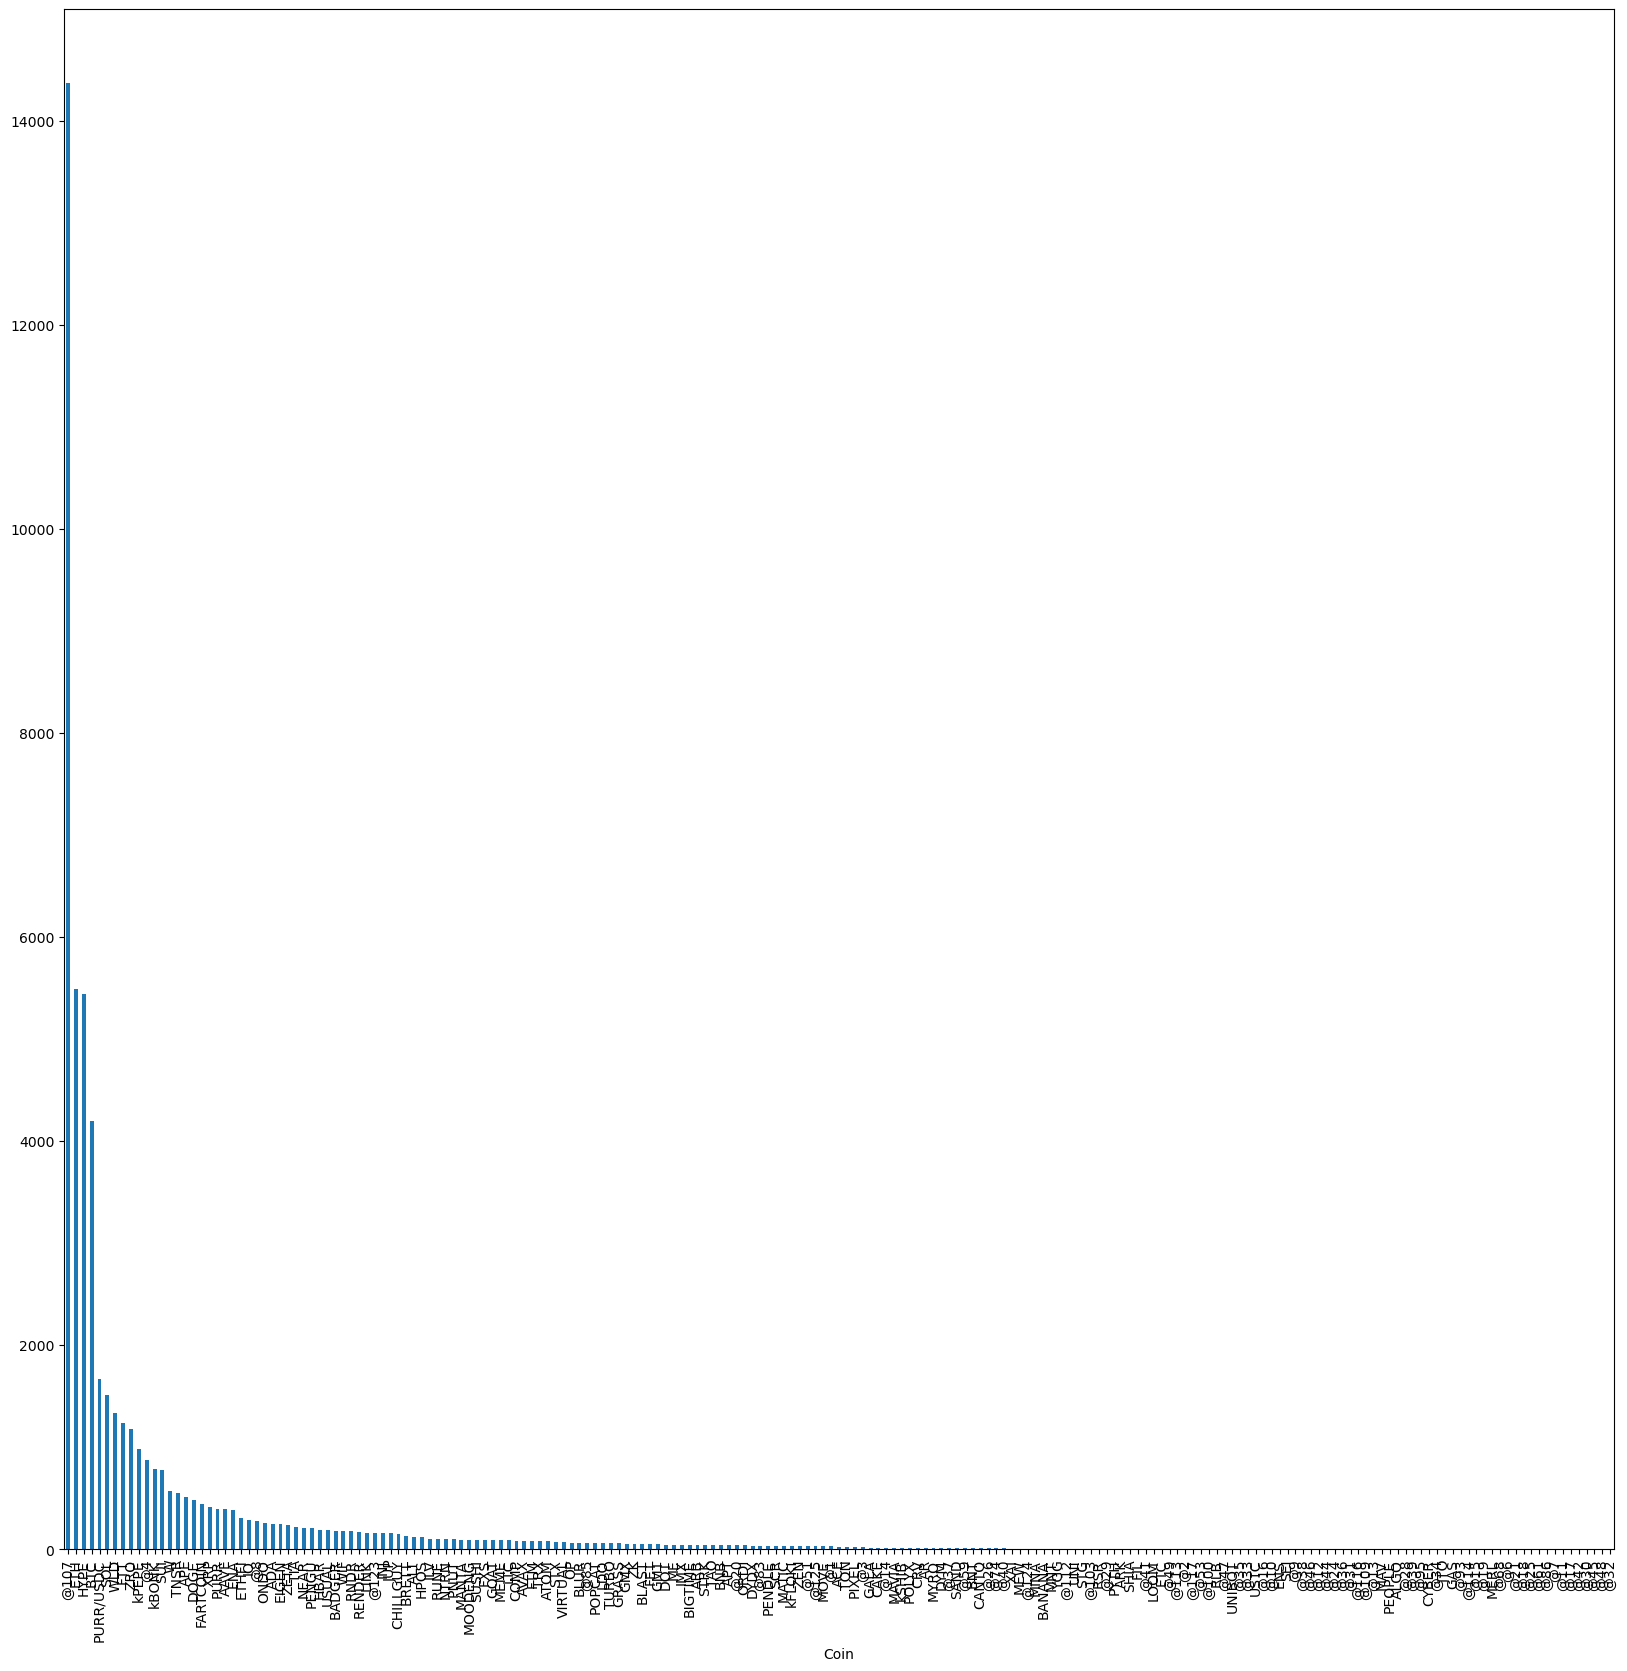

In [ ]:
plt.figure(figsize=(20,20)) 
df_2024['Coin'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [14]:
most_frequent_coin_2024=pd.DataFrame(df_2024['Coin'].value_counts().sort_values(ascending=False).head(9)).reset_index()

In [ ]:
most_frequent_coin_2024 #Coveribg 69 % of entire data

Coin  count
0       @107  14379
1        ETH   5497
2       HYPE   5441
3        BTC   4196
4  PURR/USDC   1674
5        SOL   1516
6        WLD   1339
7        FTT   1239
8        ZRO   1176

In [19]:
df_2024.shape # 52497 samples 

(52497, 19)

In [ ]:
second_most_frequent_coins=pd.DataFrame(df_2024['Coin'].value_counts().sort_values(ascending=False).head(18)).reset_index().iloc[9:,:] # Covering more 11% data

In [17]:
second_most_frequent_coins

Coin  count
9      kPEPE    984
10        @4    874
11     kBONK    790
12       SUI    782
13         W    568
14      TNSR    557
15       APE    512
16      DOGE    482
17  FARTCOIN    447

In [21]:
most_frequent_coin_2024['Coin']

0         @107
1          ETH
2         HYPE
3          BTC
4    PURR/USDC
5          SOL
6          WLD
7          FTT
8          ZRO
Name: Coin, dtype: object

In [44]:
top_coins_df_2024=df_2024[df_2024['Coin'].isin(most_frequent_coin_2024['Coin'])]

In [45]:
second_top_coins_df_2024=df_2024[df_2024['Coin'].isin(second_most_frequent_coins['Coin'])]

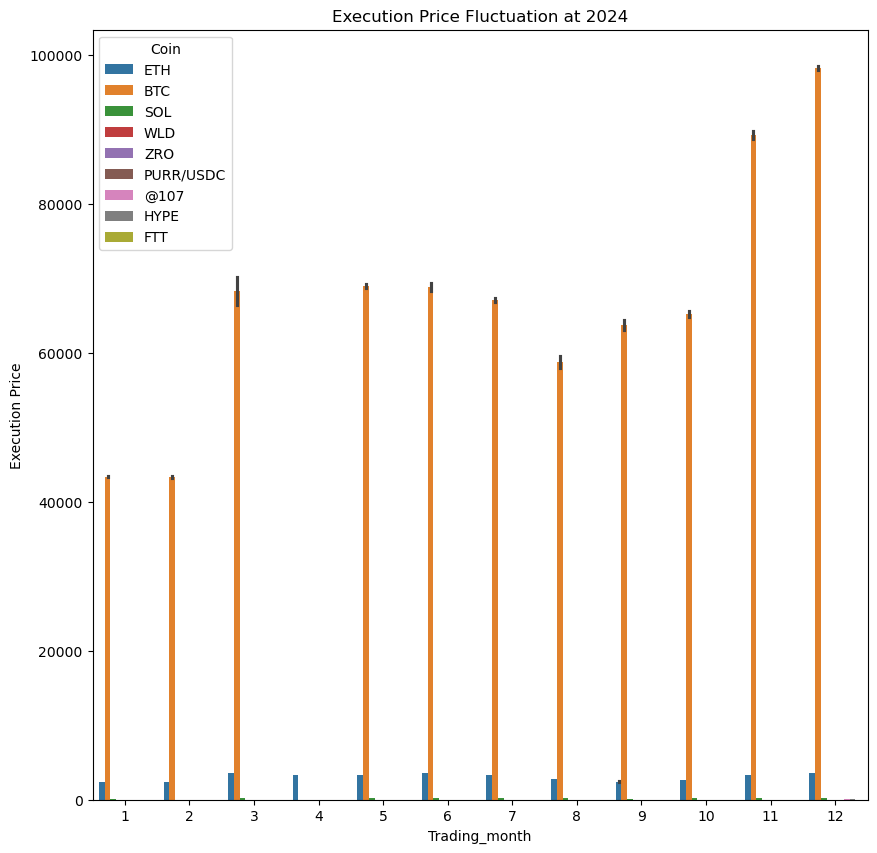

In [33]:
plt.figure(figsize=(10,10))
plt.title('Execution Price Fluctuation at 2024')
sns.barplot(data=top_coins_df_2024,x='Trading_month',y='Execution Price',hue='Coin')
plt.show()

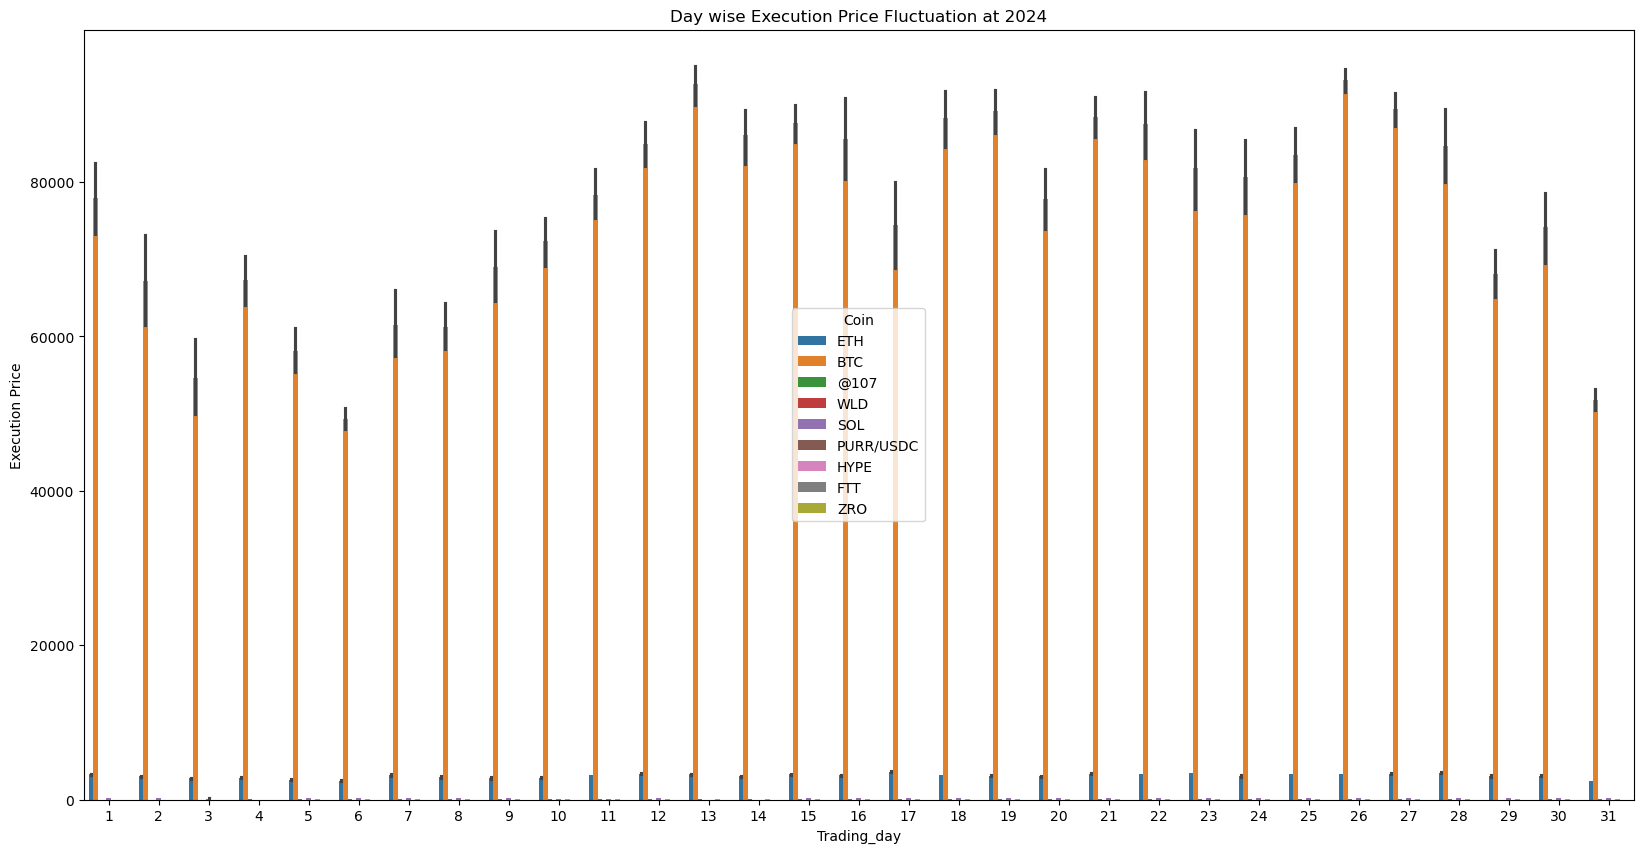

In [35]:
plt.figure(figsize=(20,10))
plt.title('Day wise Execution Price Fluctuation at 2024')
sns.barplot(data=top_coins_df_2024,x='Trading_day',y='Execution Price',hue='Coin')
plt.show()

In [18]:
import plotly.express as px

In [ ]:
# Which month and which day avg execution price is low but closed PnL>=0 (Trustworthy coins)
trustworthy_coins=top_coins_df_2024[top_coins_df_2024['Closed PnL']>0].groupby('Coin')[['Execution Price','Closed PnL']].mean().reset_index()
coin_2024=trustworthy_coins['Coin'].astype(str)
px.scatter(x=trustworthy_coins['Execution Price'],y=trustworthy_coins['Closed PnL'],color=coin_2024,color_discrete_sequence=px.colors.qualitative.G10).show()
# Conclusion  coins with less execution price but high closed PnL @107 > ZRO > PURR/USDC > WLD > HYPE > FTT > SOL (BTC/ETH) 

In [ ]:
second_trustworthy_coins=second_top_coins_df_2024.groupby('Coin')[['Execution Price','Closed PnL']].mean().reset_index()
second_coin_2024=second_trustworthy_coins['Coin'].astype(str)
px.scatter(x=second_trustworthy_coins['Execution Price'],y=second_trustworthy_coins['Closed PnL'],color=second_coin_2024,color_discrete_sequence=px.colors.qualitative.G10).show()

In [48]:
day_wise_avg_execution_price_2024=pd.DataFrame(top_coins_df_2024.groupby(by=['Trading_month','Trading_day','Coin'])['Execution Price'].mean()).reset_index()
day_wise_avg_PnL_2024=pd.DataFrame(top_coins_df_2024.groupby(by=['Trading_month','Trading_day','Coin'])['Closed PnL'].mean()).reset_index()
fig = px.line(
    day_wise_avg_execution_price_2024,
    x='Trading_day',
    y='Execution Price',
    color='Coin',
    line_group='Coin',
    markers=True,
    title='Daily Avg Execution Price per Coin (2024)',
)

fig.update_layout(
    xaxis_title='Day of Month',
    yaxis_title='Average Execution Price',
    hovermode='x unified'
)

fig.show()

In [ ]:
top_coins_2024=top_coins_df_2024['Coin'].astype(str)
px.scatter(x=top_coins_df_2024['Start Position'],y=top_coins_df_2024['Closed PnL'],color=top_coins_2024,color_discrete_sequence=px.colors.qualitative.G10).show()

In [47]:
df_2024.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side  Start Position Direction  Closed PnL  \
0       986.87   7872.16  BUY        0.000000       Buy         0.0   
1        16.00    127.68  BUY      986.524596       Buy         0.0   
2       144.09   1150.63  BUY     1002.518996       Buy         0.0   
3       142.98   1142.04  BUY     1146.558564       Buy         0.0   
4         8.73     69.75  BUY     1289.488521       Buy         0.0   

                                    Transaction Hash     Order ID  Crossed  \
0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630     True   
1  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630     True   
2  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630     True   
3  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630     True   
4  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630     True   

        Fee      Trade ID  Trading_hour  Trading_minute  Trading_year  \
0  0.345404  8.950000e+14            22              50          2024   
1  0.005600  4.430000e+14            22              50          2024   
2  0.050431  6.600000e+14            22              50          2024   
3  0.050043  1.080000e+15            22              50          2024   
4  0.003055  1.050000e+15            22              50          2024   

   Trading_month  Trading_day  
0             12            2  
1             12            2  
2             12            2  
3             12            2  
4             12            2

In [18]:
df_2025=df[df['Trading_year']==2025]

In [23]:
most_frequent_coin_2025=pd.DataFrame(df_2025['Coin'].value_counts().sort_values(ascending=False).head(18)).reset_index()

In [24]:
top_coins_df_2025=df_2025[df_2025['Coin'].isin(most_frequent_coin_2025['Coin'])]

In [ ]:
profit=data[top_coins_df_2025['Closed PnL']>0]

In [41]:
trustworthy_coins_2025=top_coins_df_2025.groupby('Coin')[['Execution Price','Closed PnL']].mean().reset_index()

In [26]:
import plotly.express as px

In [27]:
y_train_trf=trustworthy_coins_2025['Coin'].astype(str)
px.scatter(x=trustworthy_coins_2025['Execution Price'],y=trustworthy_coins_2025['Closed PnL'],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10).show()

In [28]:
day_wise_avg_execution_price_2025=pd.DataFrame(top_coins_df_2025.groupby(by=['Trading_month','Trading_day','Coin'])['Execution Price'].mean()).reset_index()
day_wise_avg_PnL_2025=pd.DataFrame(top_coins_df_2025.groupby(by=['Trading_month','Trading_day','Coin'])['Closed PnL'].mean()).reset_index()
fig = px.line(
    day_wise_avg_execution_price_2025,
    x='Trading_day',
    y='Execution Price',
    color='Coin',
    line_group='Coin',
    markers=True,
    title='Daily Avg Execution Price per Coin (2025)',
)

fig.update_layout(
    xaxis_title='Day of Month',
    yaxis_title='Average Execution Price',
    hovermode='x unified'
)

fig.show()

In [ ]:
df.groupby('Side')['Direction'].value_counts(normalize=True)*100 

Side  Direction                
BUY   Open Long                    48.585145
      Close Short                  35.067578
      Buy                          16.277168
      Short > Long                  0.068162
      Liquidated Isolated Short     0.000974
      Settlement                    0.000974
SELL  Close Long                   44.852941
      Open Short                   36.618200
      Sell                         18.338125
      Spot Dust Conversion          0.130842
      Long > Short                  0.052521
      Auto-Deleveraging             0.007371
Name: proportion, dtype: float64

In [76]:
df2['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [29]:
df2['year']=df2['date'].dt.year
df2['month']=df2['date'].dt.month
df2['day']=df2['date'].dt.day


In [20]:
df2=df2.drop(columns='date',axis=1)

In [ ]:
data=df3.merge(df4[['date', 'value', 'classification']], left_on='Date_of_trading', right_on='date', how='left').drop(columns='date') #Mrging my datas

In [34]:
x=data.groupby(['Account','classification'])[['Size USD','Closed PnL']].mean().reset_index()

<Axes: xlabel='Size USD', ylabel='Closed PnL'>

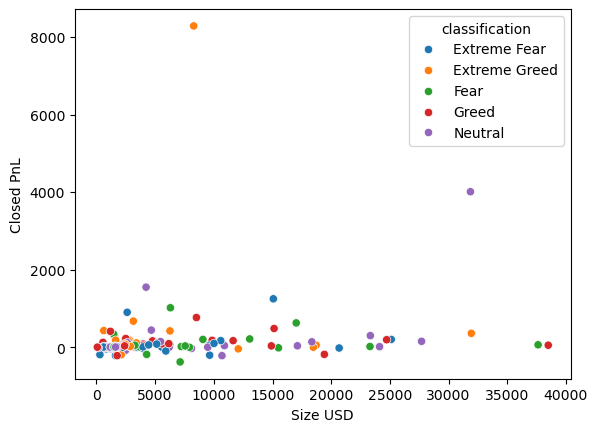

In [35]:
sns.scatterplot(data=x,x='Size USD',y='Closed PnL',hue='classification')

In [36]:
data['Trading_year']=data['Date_of_trading'].dt.year
data['Trading_month']=data['Date_of_trading'].dt.month
data['Trading_day']=data['Date_of_trading'].dt.day
data=data.drop(columns=['Date_of_trading','Time_of_trading'])

In [ ]:
# Do traders lose more during Fear markets? 
data=data[~data['classification'].isna()] # 6 rows with nan values of classification

In [ ]:
# data.groupby('Account')['classification'].value_counts()
data.groupby('classification')['Closed PnL'].describe()
    

count       mean          std           min  25%  50%  \
classification                                                            
Extreme Fear    21400.0  34.537862  1136.056091  -31036.69194  0.0  0.0   
Extreme Greed   39992.0  67.892861   766.828294  -10259.46800  0.0  0.0   
Fear            61837.0  54.290400   935.355438  -35681.74723  0.0  0.0   
Greed           50303.0  42.743559  1116.028390 -117990.10410  0.0  0.0   
Neutral         37686.0  34.307718   517.122220  -24500.00000  0.0  0.0   

                      75%           max  
classification                           
Extreme Fear     5.635032  115287.00000  
Extreme Greed   10.028709   44223.45187  
Fear             5.590856  135329.09010  
Greed            4.944105   74530.52371  
Neutral          3.995795   48504.09555

In [ ]:
# Do traders lose more during Fear markets?
for item in data['classification'].unique():
    a=pd.DataFrame(data[data['classification']==item]['Closed PnL'])
    print(f"'{item}' loss percentage: ")
    result=(len(a[a['Closed PnL']<0])/len(a))*100
    print(result)


'Extreme Greed' loss percentage: 
5.648629725945189
'Extreme Fear' loss percentage: 
11.565420560747663
'Fear' loss percentage: 
6.127399453401685
'Greed' loss percentage: 
11.565910581873846
'Neutral' loss percentage: 
8.485909886960675


In [ ]:
# Do traders take larger positions during Greed? 
data.groupby('classification')[['Start Position']].describe()

Start Position                                           \
                        count           mean           std         min   
classification                                                           
Extreme Fear          21400.0   -2322.304587  3.330542e+05  -9935779.0   
Extreme Greed         39992.0   19518.990812  3.251787e+05 -10500000.0   
Fear                  61837.0    8709.824822  4.630426e+05 -14334629.0   
Greed                 50303.0 -151088.546635  1.106267e+06 -13971298.0   
Neutral               37686.0     144.002263  5.984872e+05 -11815305.0   

                                                                   
                       25%          50%         75%           max  
classification                                                     
Extreme Fear     -25.20145  1828.705000  17943.4625  2.027468e+06  
Extreme Greed   -157.62500   314.017914  16652.0150  1.150000e+07  
Fear             -95.89610   399.115700  11552.4800  8.540364e+06  
Greed          -2398.39000     0.510990   2357.1900  3.050948e+07  
Neutral         -298.49000   225.221970   7827.5125  8.071225e+06

In [70]:
# is there a higher fee during Fear? 
data.groupby('classification')[['Fee']].mean().sort_values(by='Fee',ascending=False)

Fee
classification          
Fear            1.495172
Greed           1.254372
Extreme Fear    1.116291
Neutral         1.044798
Extreme Greed   0.675902

In [ ]:
# Do traders change direction more often during Fear?
# Which directions correlate with higher profit under each sentiment?
pd.DataFrame(data.groupby(['classification'])['Direction'].value_counts(normalize=True))

proportion
classification Direction                            
Extreme Fear   Open Long                    0.327336
               Close Long                   0.291636
               Open Short                   0.148318
               Close Short                  0.145654
               Sell                         0.048692
               Buy                          0.037710
               Short > Long                 0.000280
               Long > Short                 0.000234
               Spot Dust Conversion         0.000140
Extreme Greed  Open Short                   0.191613
               Close Long                   0.179686
               Sell                         0.179136
               Close Short                  0.162457
               Open Long                    0.157532
               Buy                          0.128326
               Spot Dust Conversion         0.000800
               Short > Long                 0.000275
               Long > Short                 0.000175
Fear           Open Long                    0.288242
               Close Long                   0.279121
               Open Short                   0.176060
               Close Short                  0.149118
               Sell                         0.054401
               Buy                          0.051862
               Spot Dust Conversion         0.000679
               Short > Long                 0.000291
               Long > Short                 0.000226
Greed          Open Short                   0.231875
               Close Short                  0.225076
               Open Long                    0.169851
               Close Long                   0.158996
               Sell                         0.118999
               Buy                          0.093136
               Spot Dust Conversion         0.001093
               Short > Long                 0.000457
               Long > Short                 0.000318
               Auto-Deleveraging            0.000159
               Liquidated Isolated Short    0.000020
               Settlement                   0.000020
Neutral        Open Long                    0.271241
               Close Long                   0.265165
               Open Short                   0.168577
               Close Short                  0.155230
               Buy                          0.076554
               Sell                         0.062251
               Long > Short                 0.000398
               Short > Long                 0.000318
               Spot Dust Conversion         0.000265

In [ ]:
# Is average profit higher during periods of Fear or Greed?
data.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)

classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64

In [75]:
# How does the number of profitable trades change with sentiment?
data[data['Closed PnL']>0].groupby('classification')['Closed PnL'].sum().sort_values(ascending=False)

classification
Fear             3.950749e+06
Greed            3.208815e+06
Extreme Greed    2.986071e+06
Neutral          1.682206e+06
Extreme Fear     1.375432e+06
Name: Closed PnL, dtype: float64

In [ ]:
# How does the number of loss trades change with sentiment?
data[data['Closed PnL']<0].groupby('classification')['Closed PnL'].sum().sort_values(ascending=True) 

classification
Extreme Greed   -2.708999e+05
Neutral         -3.892857e+05
Fear            -5.935938e+05
Extreme Fear    -6.363216e+05
Greed           -1.058686e+06
Name: Closed PnL, dtype: float64

In [ ]:
profit=data[data['Closed PnL']>0] # Data with only profit

In [ ]:
# Which coins perform best in each sentiment condition?
# Fetching Top 5 profitable coin at each market sentiment
x=profit.groupby(['classification','Coin'])['Closed PnL'].mean().reset_index()
for item in x['classification'].unique():
    print(f"'{item}' top profitable coins")
    for items in pd.DataFrame(x[x['classification']==item]['Closed PnL'].sort_values(ascending=False).head(5)).index:
        print(x['Coin'][items])
    


'Extreme Fear' top profitable coins
PNUT
ENA
TRUMP
ETH
SUI
'Extreme Greed' top profitable coins
@85
MOODENG
PEOPLE
@107
TURBO
'Fear' top profitable coins
ARB
ENA
SEI
DOGE
LAYER
'Greed' top profitable coins
AVAX
SOL
ETH
@109
@85
'Neutral' top profitable coins
DOGE
AVAX
ZRO
PNUT
LAYER


In [ ]:
# Is there a change in trading volume during Fear vs Greed?
data.groupby('classification').agg({'Size USD':'sum','Size Tokens':'sum'})
# Size USD--> Fear>Greed>Neutral>Extreme Greed>Extreme Fear

Size USD   Size Tokens
classification                            
Extreme Fear    1.144843e+08  3.586412e+07
Extreme Greed   1.244652e+08  3.532260e+08
Fear            4.833248e+08  1.850560e+08
Greed           2.885825e+08  2.371951e+08
Neutral         1.802421e+08  1.651916e+08

In [ ]:
data.groupby('classification')[['Side']].value_counts(normalize=True)

classification  Side
Extreme Fear    BUY     0.510981
                SELL    0.489019
Extreme Greed   SELL    0.551410
                BUY     0.448590
Fear            SELL    0.510487
                BUY     0.489513
Greed           SELL    0.511441
                BUY     0.488559
Neutral         BUY     0.503343
                SELL    0.496657
Name: proportion, dtype: float64

In [ ]:
# Average Closed PnL over the months
data.groupby('Trading_month').agg({'Closed PnL':'mean'})

Closed PnL
Trading_month            
1               34.276239
2               52.365743
3               53.657262
4               24.716808
5               33.520333
6               47.089156
7               54.854472
8              -84.641229
9               94.579902
10              61.247451
11              20.408386
12              99.490062

In [ ]:
# Is volatility in execution price higher during Fear? --> yes 
pd.DataFrame(data.groupby(['classification'])[['Execution Price']].std().sort_values(by='Execution Price',ascending=False))

Execution Price
classification                 
Fear               31644.432937
Greed              31515.317080
Neutral            31286.444034
Extreme Greed      23201.177889
Extreme Fear       22281.739294

In [ ]:
# trader performance score (e.g. Closed PnL / Fee)
data['Trading_performance']=data['Closed PnL']/data['Fee']


In [ ]:
# How trader performance changes with sentiment
y_train_trf=data['classification'].astype(str)
px.scatter(x=data['Trading_month'],y=data['Trading_performance'],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10).show()